# Week 2 exercise:

Coursera Colab link: https://colab.research.google.com/github/lmoroney/dlaicourse/blob/master/TensorFlow%20In%20Practice/Course%204%20-%20S%2BP/S%2BP_Week_2_Exercise_Question.ipynb

Answers Coursera Colab link: https://colab.research.google.com/github/lmoroney/dlaicourse/blob/master/TensorFlow%20In%20Practice/Course%204%20-%20S%2BP/S%2BP_Week_2_Exercise_Answer.ipynb

In [0]:
# %tensorflow_version 2.x
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.2.0-rc2


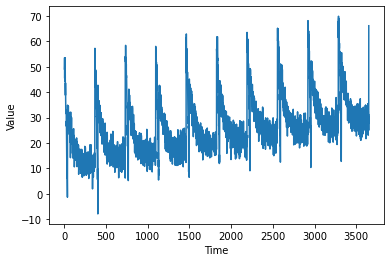

In [0]:
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(False)

def trend(time, slope=0):
    return slope * time

def seasonal_pattern(season_time):
    """Just an arbitrary pattern, you can change it if you wish"""
    return np.where(season_time < 0.1,
                    np.cos(season_time * 6 * np.pi),
                    1 / np.exp(5 * season_time))

def seasonality(time, period, amplitude=1, phase=0):
    """Repeats the same pattern at each period"""
    season_time = ((time + phase) % period) / period
    return amplitude * seasonal_pattern(season_time)

def noise(time, noise_level=1, seed=None):
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time)) * noise_level

time = np.arange(10/1 * 365 + 1, dtype="float32")
baseline = 5 # YOUR CODE HERE #
series = trend(time, slope=5) # YOUR CODE HERE#)  
baseline = 10
amplitude = 40
slope = .005 # YOUR CODE HERE#
noise_level = 3 # YOUR CODE HERE#

# Create the series
series = baseline + trend(time, slope) + seasonality(time, period=365, amplitude=amplitude)
# Update with noise
series += noise(time, noise_level, seed=51)

split_time = 3000
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]

window_size = 20
batch_size = 32
shuffle_buffer_size = 1000

plot_series(time, series)

Desired output -- a chart that looks like this:

![Chart showing upward trend and seasonailty](http://www.laurencemoroney.com/wp-content/uploads/2019/07/plot1.png)

In [0]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
  dataset = tf.data.Dataset.from_tensor_slices(series)
  dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
  dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
  dataset = dataset.shuffle(shuffle_buffer).map(lambda window: (window[:-1], window[-1]))
  dataset = dataset.batch(batch_size).prefetch(1)
  return dataset

In [0]:
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)


model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(20, activation='relu', input_shape=[window_size]),  # YOUR CODE HERE #),
    tf.keras.layers.Dense(10, activation='relu'),  # YOUR CODE HERE #, activation="relu"), 
    tf.keras.layers.Dense(1)
])

# #  Coursera alternative:
# model = tf.keras.models.Sequential([
#     tf.keras.layers.Dense(100, activation='relu', input_shape=[window_size]),  # YOUR CODE HERE #),
#     tf.keras.layers.Dense(10, activation='relu'),  # YOUR CODE HERE #, activation="relu"), 
#     tf.keras.layers.Dense(1)
# ])


model.summary()

model.compile(loss='mse', optimizer=tf.keras.optimizers.SGD(lr=3e-6, momentum=0.9), metrics=['accuracy'])  # YOUR CODE HERE #, optimizer=# YOUR CODE HERE#))


history = model.fit(dataset,epochs=200,verbose=1)


Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_29 (Dense)             (None, 10)                210       
_________________________________________________________________
dense_30 (Dense)             (None, 1)                 11        
Total params: 641
Trainable params: 641
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
94/94 [==============================] - 0s 5ms/step - loss: 249.6369 - accuracy: 0.0000e+00
Epoch 2/200
94/94 [==============================] - 1s 5ms/step - loss: 38.3074 - accuracy: 0.0000e+00
Epoch 3/200
94/94 [==============================] - 0s 4ms/step - loss: 33.1485 - accuracy: 0.0000e+00
Epoch 4/200
94/94 [==============================] - 0s 4ms/step - loss: 

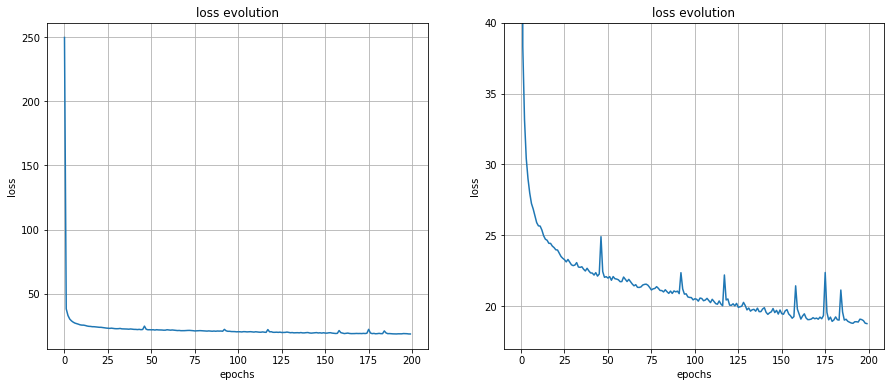

In [0]:
loss = history.history['loss']

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.plot(loss, label='training loss')
plt.grid()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('loss evolution')

plt.subplot(1,2,2)
plt.plot(loss, label='training loss')
plt.grid()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.ylim((17, 40))
plt.title('loss evolution')

plt.show()

3631
(3631, 1, 1)


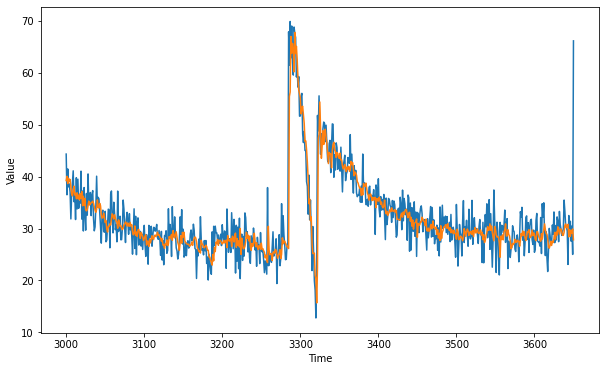

In [0]:
forecast = []
for time in range(len(series) - window_size):
  forecast.append(model.predict(series[time:time + window_size][np.newaxis]))

print(len(forecast))
print(np.array(forecast).shape)

forecast = forecast[split_time-window_size:]
results = np.array(forecast)[:, 0, 0]


plt.figure(figsize=(10, 6))

plot_series(time_valid, x_valid)
plot_series(time_valid, results)

In [0]:
print(tf.keras.metrics.mean_squared_error(x_valid, results).numpy())
print(tf.keras.metrics.mean_absolute_error(x_valid, results).numpy())

# EXPECTED OUTPUT
# A Value less than 3

17.432425
2.822274
